# Clustering Jerárquico

By: Misac Andrade Luna



# 🔗 Agrupamiento jerárquico (aglomerativo)
En este ejemplo, aplicamos **Agrupamiento jerárquico aglomerativo** al conjunto de datos Iris. Lo haremos:
 - Cargar los datos.
 - Normalizar las características numéricas.
 - Realizar agrupamiento en 3 grupos.
 - Visualizar la jerarquía con un dendrograma.
 - Graficar los clústeres resultantes.

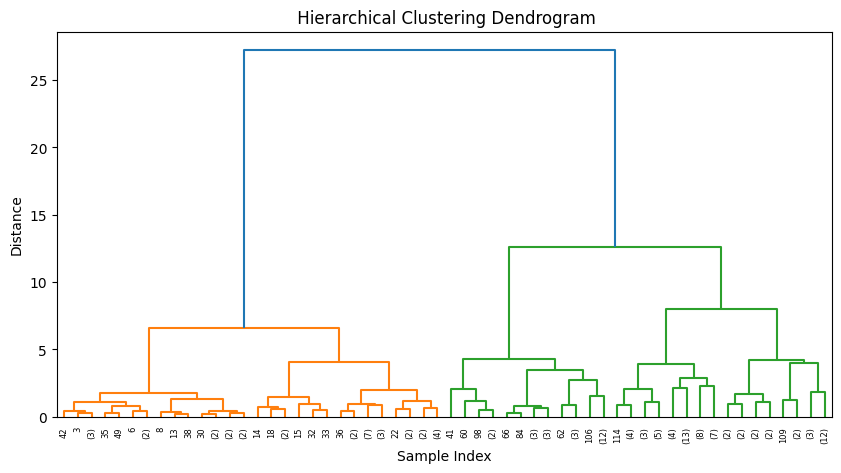

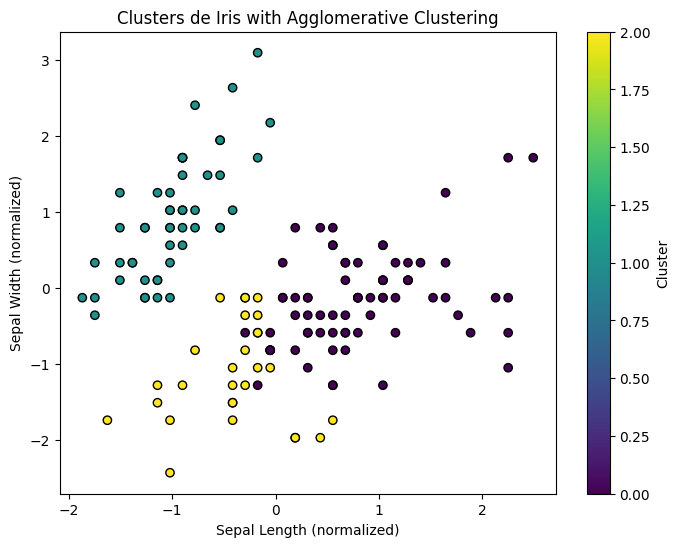

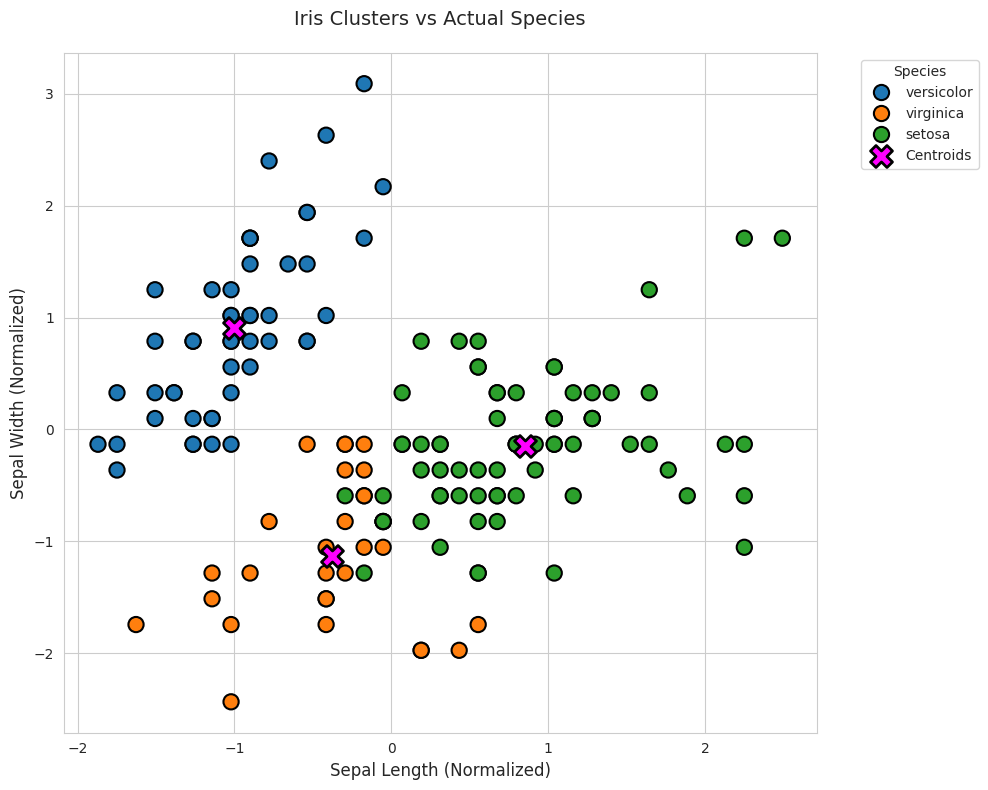

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# 1. Cargar el dataset Iris de Seaborn
iris = sns.load_dataset("iris")

# 2. Seleccionar solo las características numéricas
X = iris.drop(columns=["species"])  # Eliminamos la columna de especies

# 3. Normalizar los datos para que todas las variables tengan la misma escala
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Aplicar Agglomerative Clustering
num_clusters = 3  # Sabemos que hay 3 especies
clustering = AgglomerativeClustering(n_clusters=num_clusters)
iris['Cluster'] = clustering.fit_predict(X_scaled)  # Agregamos los clusters al DataFrame

# 5. Visualizar el dendrograma para ver la jerarquía de clusters
plt.figure(figsize=(10, 5))
Z = linkage(X_scaled, method='ward')
dendrogram(Z, truncate_mode='level', p=5)  # Solo muestra los niveles más relevantes
plt.title(" Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

# 6. Graficar los clusters con las dos primeras características
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=iris['Cluster'], cmap='viridis', edgecolors='k')
plt.title("Clusters de Iris with Agglomerative Clustering")
plt.xlabel("Sepal Length (normalized)")
plt.ylabel("Sepal Width (normalized)")
plt.colorbar(label="Cluster")
plt.show()


# Create a figure with specified size (10x8 inches)
plt.figure(figsize=(10, 8))

# Use seaborn's whitegrid style for the plot
with sns.axes_style("whitegrid"):
    # Map cluster numbers to actual species names (assuming correct order)
    species_map = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
    iris['Cluster_Name'] = iris['Cluster'].map(species_map)

    # Create scatter plot using species names in legend (instead of numbers)
    scatter = sns.scatterplot(
        x=X_scaled[:, 0],  # Sepal Length (normalized)
        y=X_scaled[:, 1],  # Sepal Width (normalized)
        hue=iris['Cluster_Name'],  # Color points by species name
        palette='tab10',   # Use a distinct color palette
        s=120,            # Set point size
        edgecolor='black', # Add black borders to points
        linewidth=1.5      # Border thickness
    )

    # Calculate and plot cluster centroids
    centroids = pd.DataFrame(X_scaled).groupby(iris['Cluster']).mean().values
    plt.scatter(
        centroids[:, 0],   # X-coordinate of centroids
        centroids[:, 1],   # Y-coordinate of centroids
        marker='X',        # Use 'X' marker for centroids
        s=250,            # Size of centroid markers
        color='magenta',  # Bright color for visibility
        label='Centroids', # Legend label
        linewidths=2,      # Thickness of 'X' lines
        edgecolor='black'  # Black border for centroids
    )

    # Add title and axis labels with custom styling
    plt.title("Iris Clusters vs Actual Species", fontsize=14, pad=20)
    plt.xlabel("Sepal Length (Normalized)", fontsize=12)
    plt.ylabel("Sepal Width (Normalized)", fontsize=12)

    # Customize legend position and title
    plt.legend(title='Species', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to prevent overlapping elements
plt.tight_layout()

# Save the figure as high-resolution PNG (300 DPI)
plt.savefig('clusters_con_especies.png', dpi=300)

# Display the plot
plt.show()

In [ ]:
import plotly.express as px

# Crear un DataFrame con los datos y clusters
df_plot = pd.DataFrame(X_scaled, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
df_plot['Cluster'] = iris['Cluster']

# Gráfico 3D
fig = px.scatter_3d(df_plot,
                    x='sepal_length',
                    y='sepal_width',
                    z='petal_length',
                    color='Cluster',
                    color_continuous_scale='viridis',
                    title="Clusters de Iris en 3D")
fig.update_layout(margin=dict(l=0, r=0, b=0, t=30))
fig.show()
fig.write_html("clusters_3d_interactivo.html")  # Para subir a GitHub